In [26]:
import pandas as pd
import pydataset
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
titanic = pydataset.data('titanic')

In [28]:
titanic.columns

Index(['class', 'age', 'sex', 'survived'], dtype='object')

In [29]:
titanic['class'].describe()

count          1316
unique            3
top       3rd class
freq            706
Name: class, dtype: object

In [30]:
titanic['class'].nbytes

10528

In [31]:
%%time
titanic['class'] == '3rd class'

CPU times: user 650 µs, sys: 15 µs, total: 665 µs
Wall time: 708 µs


1       False
2       False
3       False
4       False
5       False
        ...  
1312     True
1313     True
1314     True
1315     True
1316     True
Name: class, Length: 1316, dtype: bool

In [32]:
titanic['class'] = titanic['class'].astype('category')

In [33]:
titanic['class'].describe()

count          1316
unique            3
top       3rd class
freq            706
Name: class, dtype: object

In [34]:
titanic['class'].nbytes

1340

In [35]:
%%time
titanic['class'] == '3rd class'

CPU times: user 336 µs, sys: 19 µs, total: 355 µs
Wall time: 345 µs


1       False
2       False
3       False
4       False
5       False
        ...  
1312     True
1313     True
1314     True
1315     True
1316     True
Name: class, Length: 1316, dtype: bool

#### Exercício 1 - faça o head()

In [36]:
titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


#### Exercício 02 - distribuição de frequência

In [37]:
freq_distrib = titanic['class'].value_counts()
freq_distrib = freq_distrib.reset_index()
freq_distrib = pd.DataFrame(freq_distrib)
freq_distrib.rename(columns={'index':'Classe', 'class': "Quantidade"}, inplace=True)
freq_distrib.head()

,Classe,Quantidade
0,3rd class,706
1,1st class,325
2,2nd class,285


#### Exercício 03 A - sobreviventes por categoria; mortos por sexo e idade

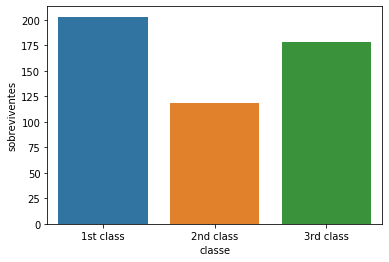

In [38]:
titanic_survived = titanic[titanic["survived"] == "yes"]
titanic_survived_by_class = titanic_survived['class'].value_counts()
titanic_survived_by_class = titanic_survived_by_class.reset_index()
titanic_survived_by_class.rename(columns={'index':'classe', 'class': "sobreviventes"}, inplace=True)

sns.barplot(x='classe', y='sobreviventes', data=titanic_survived_by_class)
plt.show()

/Users/gabriel/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


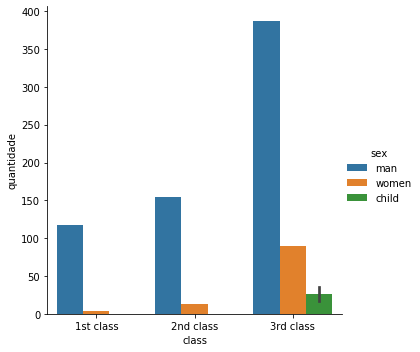

In [39]:
titanic_death = titanic[titanic["survived"] != "yes"]

titanic_death.head()
titanic_death_grouped = titanic_death.groupby(['class', 'age', 'sex', 'survived']).size().reset_index(name="quantidade")
titanic_death_grouped.loc[titanic_death_grouped['age'] == "child", "sex"] = "child"
titanic_death_grouped = titanic_death_grouped.drop(['age'], axis=1)
sns.factorplot(x='class', y='quantidade', hue='sex', data=titanic_death_grouped, kind='bar')
plt.show()

#### Exercício 04 - histogramas para categoria

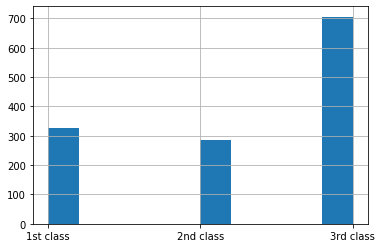

In [40]:
titanic['class'].hist()

#### Exercício 05 - diagramas de ramos e folhas para categoria

/Users/gabriel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

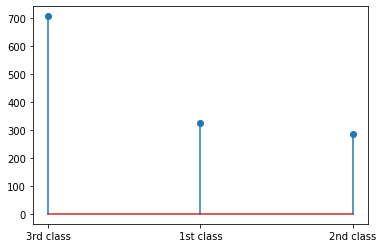

In [41]:
plt.stem(freq_distrib['Classe'], freq_distrib['Quantidade'])

In [42]:
referencias = ['1st class', '2nd class', '3rd class']
class1st = titanic.loc[(titanic['survived'] == 'yes') & (titanic['class'] == '1st class'), 'class'].count()
class2nd = titanic.loc[(titanic['survived'] == 'yes') & (titanic['class'] == '2nd class'), 'class'].count()
class3rd = titanic.loc[(titanic['survived'] == 'yes') & (titanic['class'] == '3rd class'), 'class'].count()
totais = [class1st, class2nd, class3rd]
df_class = pd.DataFrame(data={'Class': referencias, 'Quantidade de Sobreviventes': totais}, index=range(1,4))

#### Exercício 06 - Calcule a média aritmética para classe

In [43]:
df_class.mean()

Quantidade de Sobreviventes    166.333333
dtype: float64

#### Exercício 07 - Calcule a moda para classe

In [44]:
titanic['class'].mode()

0    3rd class
Name: class, dtype: category
Categories (3, object): [1st class, 2nd class, 3rd class]

#### Exercício 08 - Calcule a mediana para classe

In [45]:
init = len(titanic['class'])//2
final = (len(titanic['class'])//2)+1
titanic['class'].iloc[init:final]

659    3rd class
Name: class, dtype: category
Categories (3, object): [1st class, 2nd class, 3rd class]

#### Exercício 09 - Calcule as medidas de dispersão

In [46]:
titanic['class'].describe()

count          1316
unique            3
top       3rd class
freq            706
Name: class, dtype: object

#### Exercício 10 - Determine e interprete as medidas de assimetria e curtose para classe

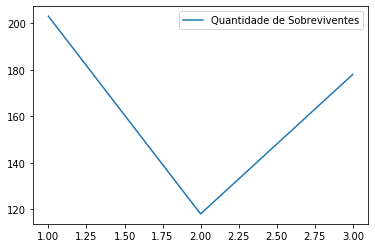

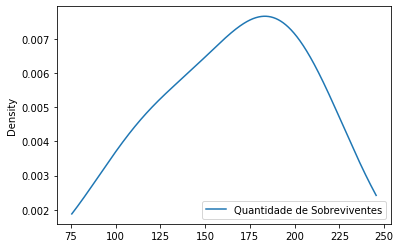

In [47]:
#assimetrica
df_class.plot()
#curtose
df_class.plot.kde()

#### Exercício 11 - Faça o gráfico Box Plot para classe

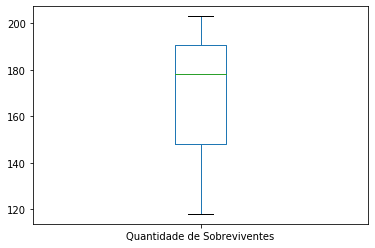

In [48]:
df_class.plot.box()